In [3]:
from concurrent.futures import ThreadPoolExecutor
from typing import List, Dict, Callable
from util import llm_call, extract_xml

## Prompt-Chaining:
* Decomposing a task into sequential subtasks, where each step builds on previous results

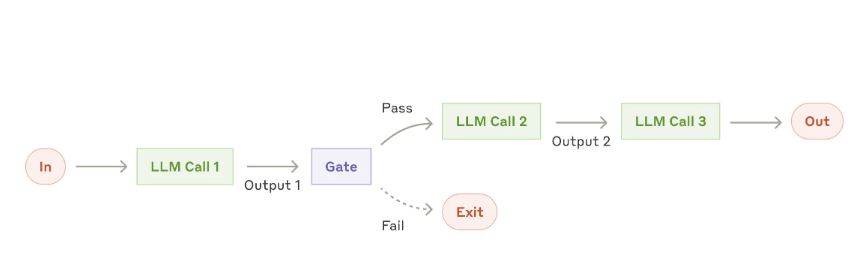

In [4]:
def chain(input:str, prompts:list[str]):
    """Chain multiple LLM calls sequentially, passing results between steps.
    """
    result = input
    for i, prompt in enumerate(prompts, 1):
        print(f"\nStep {i}:")
        result = llm_call(f"{prompt}\nInput: {result}")
        print(result)
    return result

In [7]:
data_processing_steps = [
    """Extract only the numerical values and their associated metrics from the text.
    Format each as 'value: metric' on a new line.
    Example format:
    92: customer satisfaction
    45%: revenue growth""",
    
    """Convert all numerical values to percentages where possible.
    If not a percentage or points, convert to decimal (e.g., 92 points -> 92%).
    Keep one number per line.
    Example format:
    92%: customer satisfaction
    45%: revenue growth""",
    
    """Sort all lines in descending order by numerical value.
    Keep the format 'value: metric' on each line.
    Example:
    92%: customer satisfaction
    87%: employee satisfaction""",
    
    """Format the sorted data as a markdown table with columns:
    | Metric | Value |
    |:--|--:|
    | Customer Satisfaction | 92% |"""
]

In [8]:
report = """
Q3 Performance Summary:
Our customer satisfaction score rose to 92 points this quarter.
Revenue grew by 45% compared to last year.
Market share is now at 23% in our primary market.
Customer churn decreased to 5% from 8%.
New user acquisition cost is $43 per user.
Product adoption rate increased to 78%.
Employee satisfaction is at 87 points.
Operating margin improved to 34%.
"""


In [9]:
print("\nInput text:")
print(report)
formatted_result = chain(report, data_processing_steps)
print(formatted_result)


Input text:

Q3 Performance Summary:
Our customer satisfaction score rose to 92 points this quarter.
Revenue grew by 45% compared to last year.
Market share is now at 23% in our primary market.
Customer churn decreased to 5% from 8%.
New user acquisition cost is $43 per user.
Product adoption rate increased to 78%.
Employee satisfaction is at 87 points.
Operating margin improved to 34%.


Step 1:
Here are the numerical values and their associated metrics:

92: customer satisfaction
45%: revenue growth
23%: market share
5%: customer churn
43: new user acquisition cost
78%: product adoption rate
87: employee satisfaction
34%: operating margin

Step 2:
Here is the converted output:


92%: customer satisfaction
45%: revenue growth
23%: market share
5%: customer churn
43: new user acquisition cost
78%: product adoption rate
87: employee satisfaction
34%: operating margin

Step 3:
To sort the lines in descending order by numerical value, I'll use a simple sorting algorithm. Here's the modif